In [125]:
# %pip install seaborn

In [ ]:
import pandas as pd

df = pd.read_csv('dataset/raw_data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


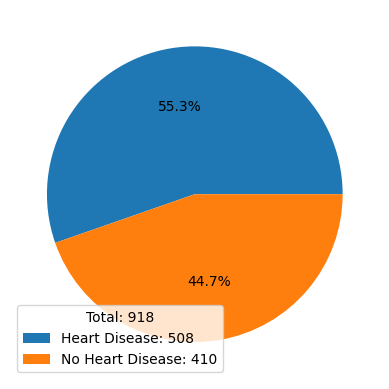

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hd_count = [sum(df['HeartDisease']), len(df) - sum(df['HeartDisease'])]

plt.pie(hd_count, autopct='%1.1f%%')

plt.legend([f"Heart Disease: {hd_count[0]}", f"No Heart Disease: {hd_count[1]}"], title=f"Total: {len(df)}")

plt.show()


Label feature is fairly balanced

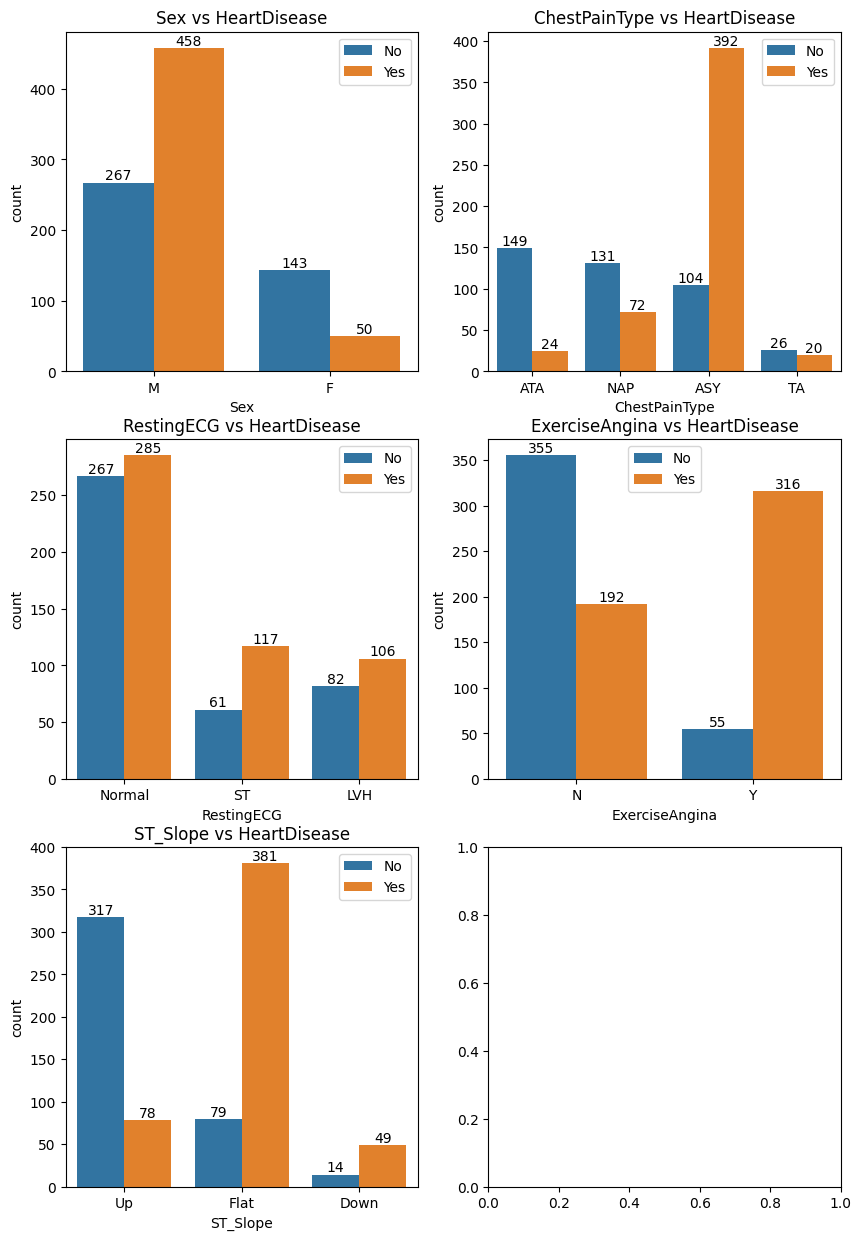

In [159]:
import seaborn as sns

qualitative_features = [ col for col in df.columns if type(df[col][0]) == str]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
ax = ax.flatten()

for i, feature in enumerate(qualitative_features):
    sns.countplot(data=df, x=feature, hue="HeartDisease", ax=ax[i])
    
    ax[i].set_title(f"{feature} vs HeartDisease")
    ax[i].legend(["No", "Yes"])
    
    for p in ax[i].patches:
        if p.get_height() > 0:  # Only annotate bars with height > 0
            ax[i].annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom')

plt.show()
